<a href="https://colab.research.google.com/github/NickLin910221/nutn_DBscience_course/blob/master/1217.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
install.packages("SportsAnalytics")
library(SportsAnalytics)
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
data = NBA1516<-fetch_NBAPlayerStatistics("19-20")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

`geom_smooth()` using formula 'y ~ x'



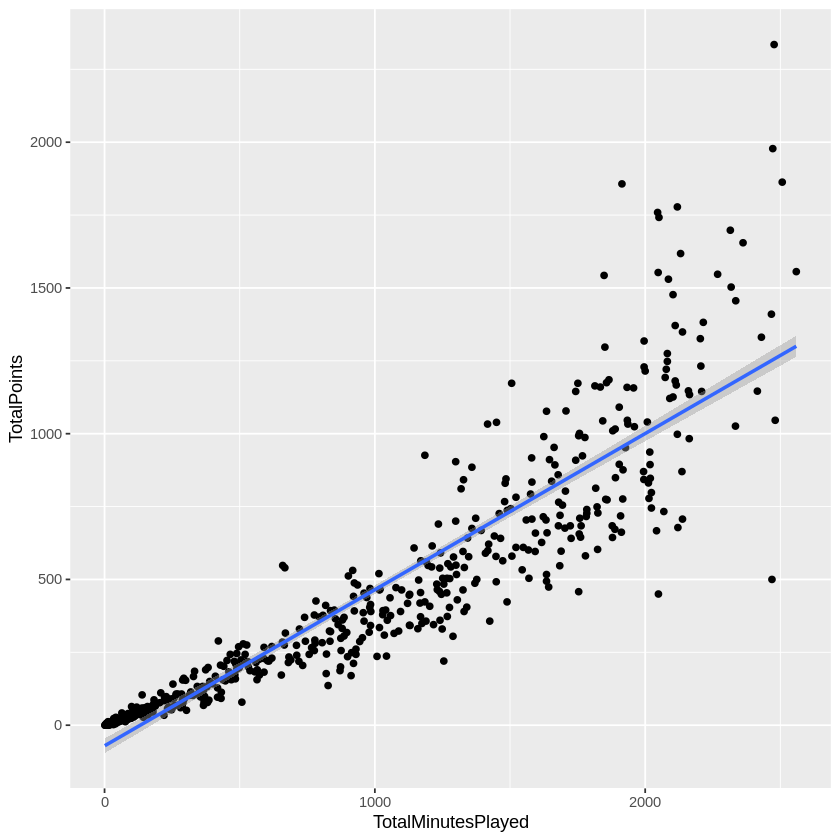

In [3]:
ggplot(data,aes(x=TotalMinutesPlayed,y=TotalPoints))+geom_point()+geom_smooth(method = "glm")

In [12]:
lm(TotalPoints~TotalMinutesPlayed,data = data, family = "binomial")

Warning message:
“In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument ‘family’ will be disregarded”



Call:
lm(formula = TotalPoints ~ TotalMinutesPlayed, data = data, family = "binomial")

Coefficients:
       (Intercept)  TotalMinutesPlayed  
          -70.8163              0.5357  


In [13]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted, data =data)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted, 
    data = data)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
           -11.3738              -0.0117               1.3224  

Degrees of Freedom: 528 Total (i.e. Null);  526 Residual
Null Deviance:	    96030000 
Residual Deviance: 1992000 	AIC: 5865

In [15]:
glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,data = data)


Call:  glm(formula = TotalPoints ~ TotalMinutesPlayed + FieldGoalsAttempted + 
    Position, data = data)

Coefficients:
        (Intercept)   TotalMinutesPlayed  FieldGoalsAttempted  
           23.63957             -0.02072              1.34615  
         PositionPF           PositionPG           PositionSF  
          -21.34247            -52.67148            -39.72243  
         PositionSG  
          -50.92796  

Degrees of Freedom: 528 Total (i.e. Null);  522 Residual
Null Deviance:	    96030000 
Residual Deviance: 1809000 	AIC: 5822

In [21]:
data_ = read.csv("https://raw.githubusercontent.com/CGUIM-BigDataAnalysis/BigDataCGUIM/master/binary.csv")
head(data)

,League,Name,Team,Position,GamesPlayed,TotalMinutesPlayed,FieldGoalsMade,FieldGoalsAttempted,ThreesMade,ThreesAttempted,⋯,Steals,Turnovers,Blocks,PersonalFouls,Disqualifications,TotalPoints,Technicals,Ejections,FlagrantFouls,GamesStarted
,<fct>,<chr>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,NBA,Steven Adams,OKL,C,63,1679,283,478,1,3,⋯,51,95,68,122,1,684,2,0,0,63
2,NBA,Bam Adebayo,MIA,PF,72,2415,440,791,2,14,⋯,82,203,93,182,2,1146,0,0,0,72
3,NBA,Lamarcu Aldridge,SAN,C,53,1757,391,794,61,157,⋯,36,74,87,128,1,1001,0,0,0,53
4,NBA,Kyle Alexander,MIA,PF,2,13,1,2,0,0,⋯,0,1,0,1,0,2,0,0,0,0
5,NBA,Alexander-walke,NOR,SG,47,590,98,266,46,133,⋯,17,54,8,57,0,267,0,0,0,1
6,NBA,Grayson Allen,MEM,SG,38,721,117,251,57,141,⋯,12,33,2,53,0,330,1,0,0,0


In [22]:
data_$rank = factor(data_$rank)
mylogit = glm(admit ~ gre + gpa + rank, data = data_, family = "binomial")
sum = summary(mylogit)
sum$coefficients

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-3.989979073,1.139950936,-3.500132,0.0004650273
gre,0.002264426,0.001093998,2.069864,0.0384651284
gpa,0.804037549,0.331819298,2.423119,0.0153878974
rank2,-0.675442928,0.316489661,-2.134171,0.0328288188
rank3,-1.340203916,0.345306418,-3.881202,0.0001039415
rank4,-1.551463677,0.417831633,-3.713131,0.0002047107


In [25]:
OneVar = glm(TotalPoints~TotalMinutesPlayed,data =data)
TwoVar = glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted,data =data)
ThreeVar = glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+Position,data =data)

c(OneVar$aic,TwoVar$aic,ThreeVar$aic)

[1] 6978.633 5864.935 5821.849

In [27]:
sum2 = summary(TwoVar)
sum2$coefficients
sum3 = summary(ThreeVar)
sum3$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-11.37380632,4.568975249,-2.489356,1.310539e-02
TotalMinutesPlayed,-0.01169857,0.009608907,-1.217471,2.239708e-01
FieldGoalsAttempted,1.32243665,0.021428677,61.713408,4.702556e-243


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),23.63956869,7.384746012,3.201135,1.452215e-03
TotalMinutesPlayed,-0.02072422,0.009335607,-2.219911,2.685362e-02
FieldGoalsAttempted,1.34615251,0.020917982,64.353842,2.232344e-250
PositionPF,-21.34246839,8.564855571,-2.491866,1.301663e-02
PositionPG,-52.67147779,8.576736893,-6.141202,1.623989e-09
PositionSF,-39.72243353,8.434751724,-4.709378,3.189064e-06
PositionSG,-50.92796027,8.610658996,-5.914525,6.023402e-09


In [28]:
install.packages("rpart")
library(rpart)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [29]:
DT = rpart(Position~Blocks+ThreesMade+Assists+Steals,data=data)
DT

n= 529 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 529 413 SF (0.16 0.2 0.21 0.22 0.21)  
    2) Blocks>=34.5 94  49 C (0.48 0.3 0.032 0.15 0.043)  
      4) ThreesMade< 22.5 35   6 C (0.83 0.17 0 0 0) *
      5) ThreesMade>=22.5 59  37 PF (0.27 0.37 0.051 0.24 0.068)  
       10) Steals< 52.5 33  18 PF (0.42 0.45 0.03 0.061 0.03)  
         20) Blocks>=41.5 24  11 C (0.54 0.33 0.042 0.083 0) *
         21) Blocks< 41.5 9   2 PF (0.11 0.78 0 0 0.11) *
       11) Steals>=52.5 26  14 SF (0.077 0.27 0.077 0.46 0.12) *
    3) Blocks< 34.5 435 326 PG (0.09 0.18 0.25 0.23 0.24)  
      6) Assists>=217 53  14 PG (0.019 0.019 0.74 0.075 0.15) *
      7) Assists< 217 382 284 SF (0.099 0.21 0.18 0.26 0.25)  
       14) ThreesMade< 4.5 119  84 PF (0.19 0.29 0.16 0.17 0.18) *
       15) ThreesMade>=4.5 263 185 SF (0.057 0.17 0.19 0.3 0.29)  
         30) Blocks>=10.5 118  79 SF (0.093 0.24 0.068 0.33 0.27)  
           60) Steals< 45.5 70  47 PF (0.14 0.33 0.043

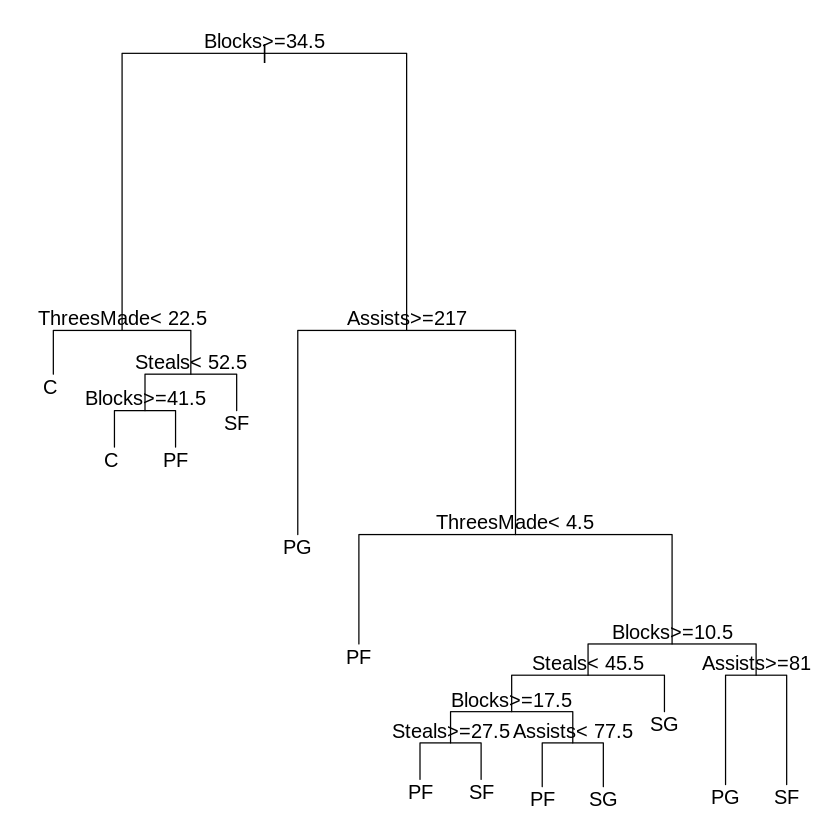

In [30]:
par(mfrow=c(1,1), mar = rep(1,4))
plot(DT)
text(DT, use.n=F, all=F, cex=1)

In [33]:
install.packages("rpart.plot")
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



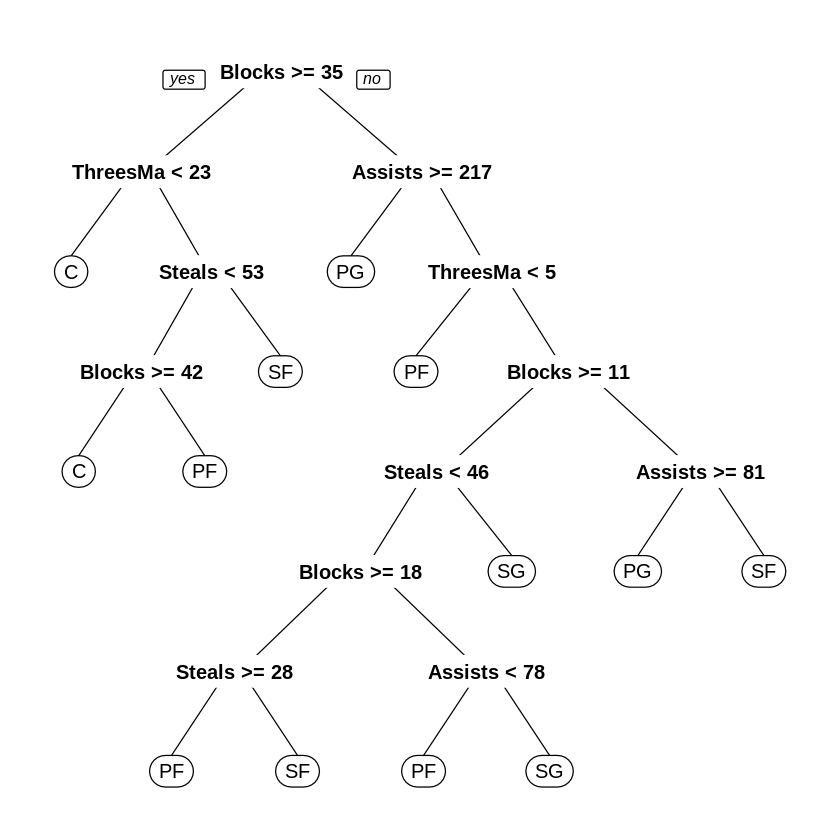

In [34]:
prp(DT)

In [35]:
mtcars.mxs = as.matrix(mtcars)
d = dist(mtcars.mxs)
head(d)

[1]   0.6153251  54.9086059  98.1125212 210.3374396  65.4717710 241.4076490

In [36]:
d = dist(mtcars.mxs, method="manhattan")

[1]   0.815  79.300 108.795 275.430  84.640 347.960

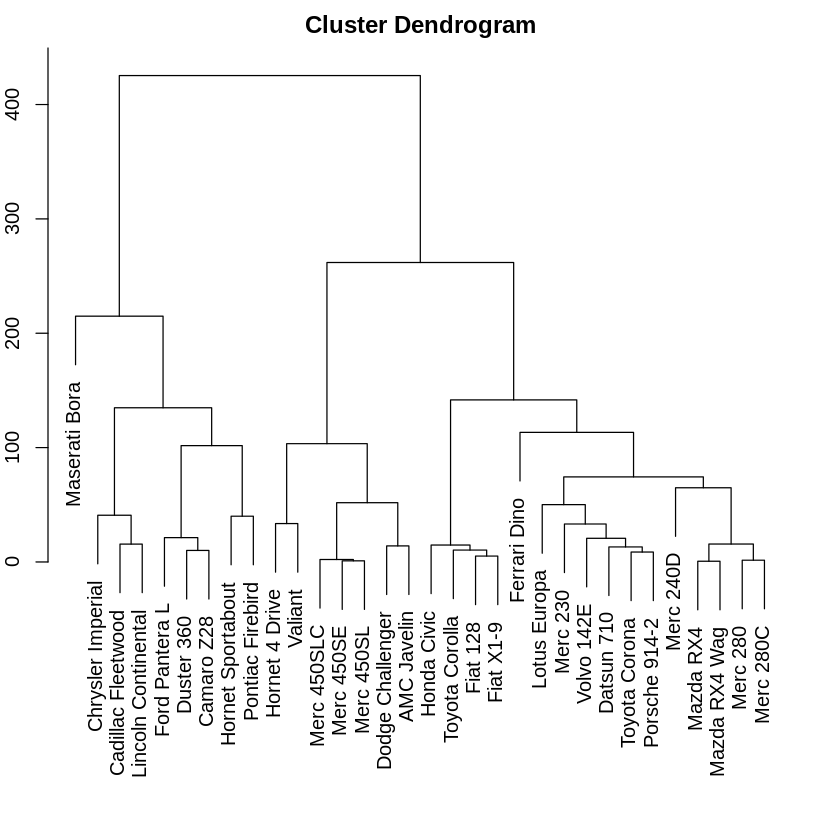

In [37]:
par(mar=rep(2,4),mfrow=c(1,1))
hc = hclust(dist(mtcars.mxs))
plot(hc)

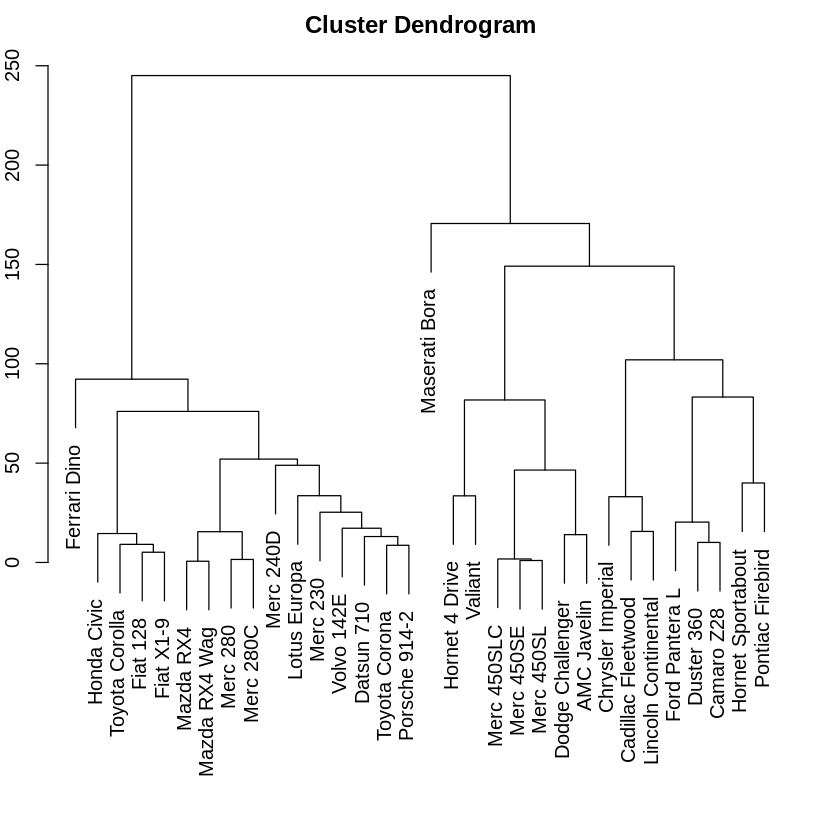

In [38]:
par(mar=rep(2,4),mfrow=c(1,1))
hc = hclust(dist(mtcars.mxs),method="average")
plot(hc)

In [39]:
clusterCut = cutree(hc, k=5) 
sort(clusterCut)

Mazda RX4       Mazda RX4 Wag          Datsun 710           Merc 240D 
                  1                   1                   1                   1 
           Merc 230            Merc 280           Merc 280C            Fiat 128 
                  1                   1                   1                   1 
        Honda Civic      Toyota Corolla       Toyota Corona           Fiat X1-9 
                  1                   1                   1                   1 
      Porsche 914-2        Lotus Europa        Ferrari Dino          Volvo 142E 
                  1                   1                   1                   1 
     Hornet 4 Drive             Valiant          Merc 450SE          Merc 450SL 
                  2                   2                   2                   2 
        Merc 450SLC    Dodge Challenger         AMC Javelin   Hornet Sportabout 
                  2                   2                   2                   3 
         Duster 360          Camaro Z28    Pontiac Firebird      Ford Pantera L 
                  3                   3                   3                   3 
 Cadillac Fleetwood Lincoln Continental   Chrysler Imperial       Maserati Bora 
                  4                   4                   4                   5

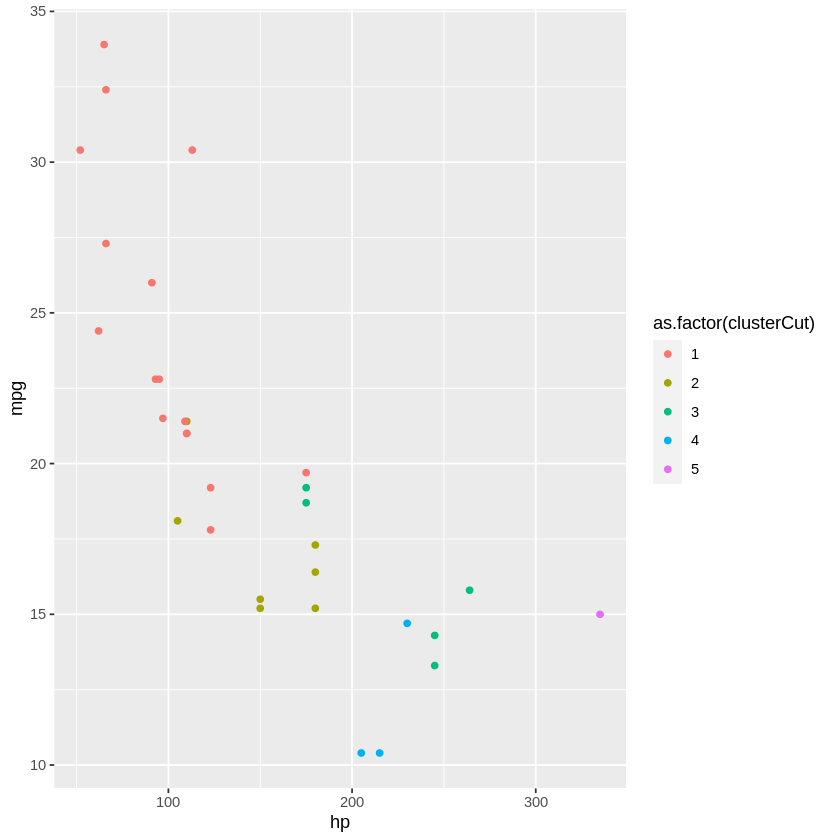

In [40]:
ggplot()+geom_point(data=mtcars,aes(x=hp,y=mpg,color=as.factor(clusterCut)))

In [41]:
clusterCut = cutree(hc,h =4)
sort(clusterCut)

Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
                  1                   1                   2                   3 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
                  4                   5                   6                   7 
           Merc 230            Merc 280           Merc 280C          Merc 450SE 
                  8                   9                   9                  10 
         Merc 450SL         Merc 450SLC  Cadillac Fleetwood Lincoln Continental 
                 10                  10                  11                  12 
  Chrysler Imperial            Fiat 128         Honda Civic      Toyota Corolla 
                 13                  14                  15                  16 
      Toyota Corona    Dodge Challenger         AMC Javelin          Camaro Z28 
                 17                  18                  19                  20 
   Pontiac Firebird           Fiat X1-9       Porsche 914-2        Lotus Europa 
                 21                  22                  23                  24 
     Ford Pantera L        Ferrari Dino       Maserati Bora          Volvo 142E 
                 25                  26                  27                  28

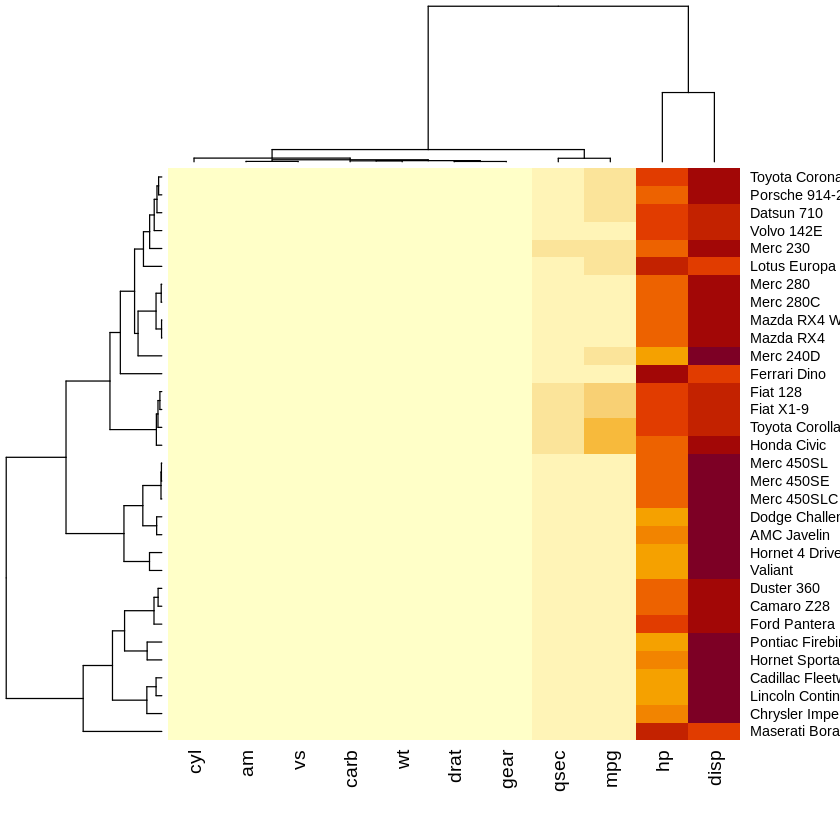

In [42]:
par(mar=rep(0.2,4),mfrow=c(1,1))
heatmap(mtcars.mxs)

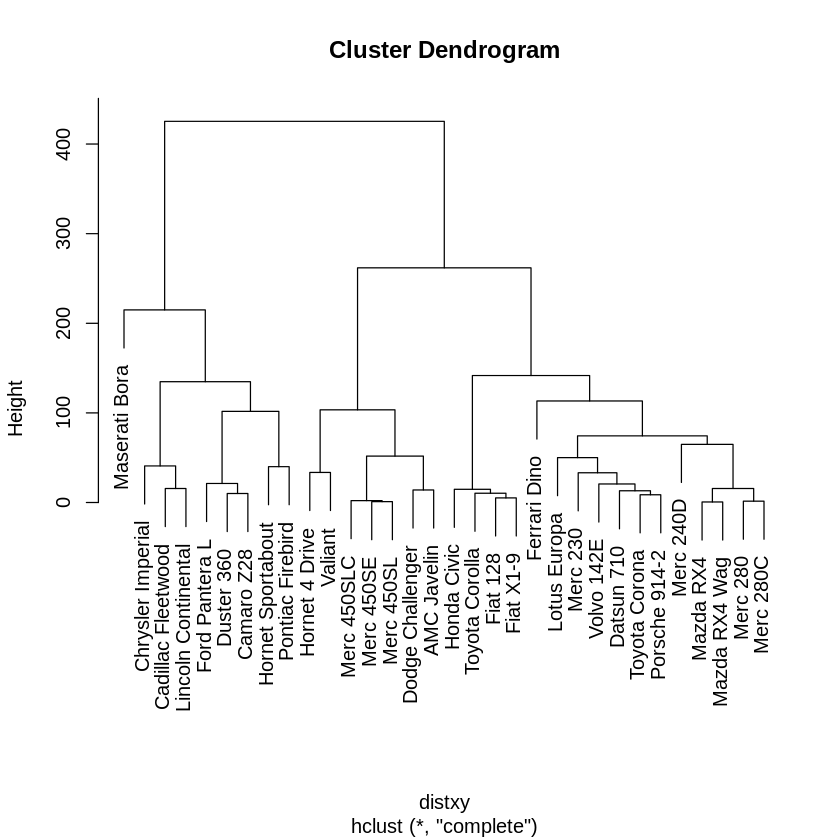

In [43]:
distxy = dist(mtcars.mxs)
hClustering = hclust(distxy)
plot(hClustering)

ERROR: ignored

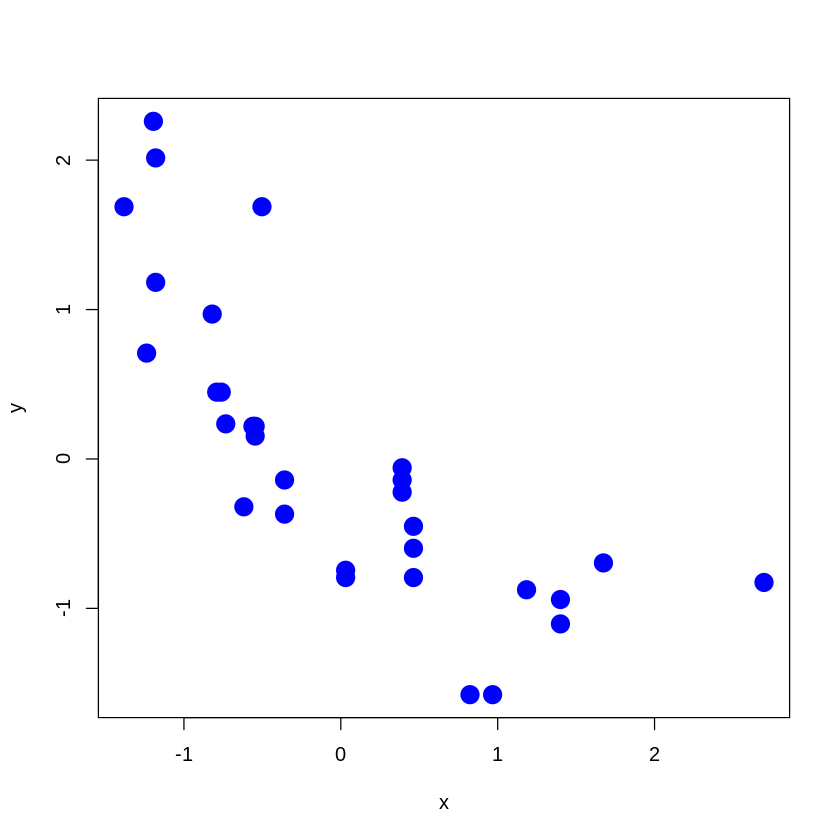

In [45]:
x = scale(mtcars$hp[-1]);y<-scale(mtcars$mpg[-1])
plot(x,y,col="blue",pch=19,cex=2)
text(x+0.05,y+0.05,labels=labelCar)

In [46]:
dataFrame = data.frame(x,y)
kmeansObj = kmeans(dataFrame,centers=3)
names(kmeansObj)

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

In [47]:
kmeansObj$cluster

[1] 3 3 3 2 3 2 3 3 3 3 2 2 2 2 2 2 1 1 1 3 2 2 2 2 1 1 1 2 2 2 3

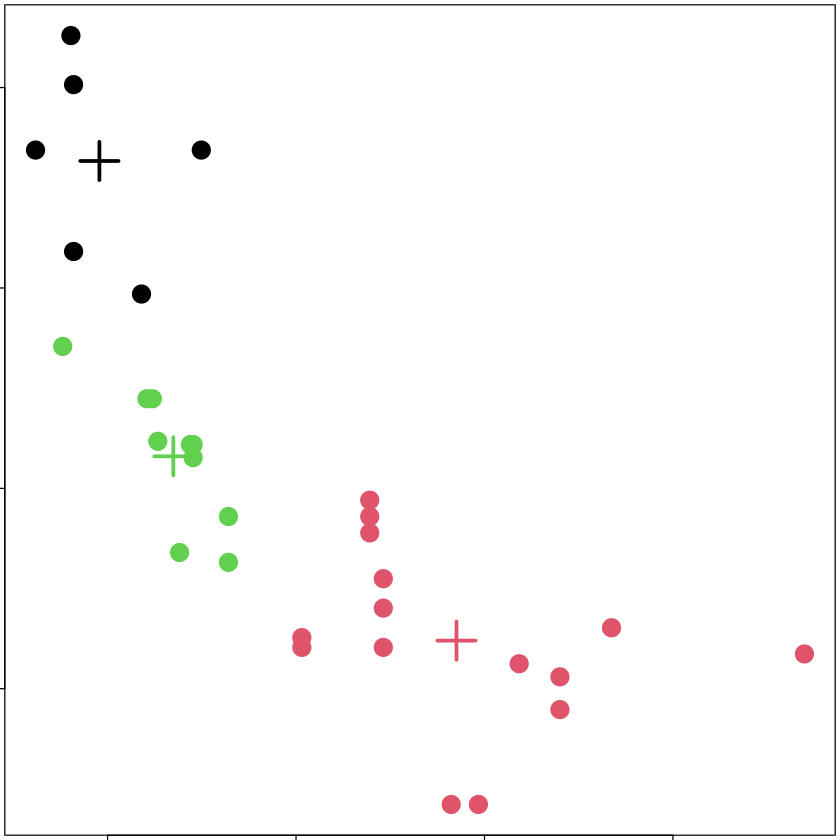

In [48]:
par(mar=rep(0.2,4))
plot(x,y,col=kmeansObj$cluster,pch=19,cex=2)
points(kmeansObj$centers,col=1:3,pch=3,cex=3,lwd=3)

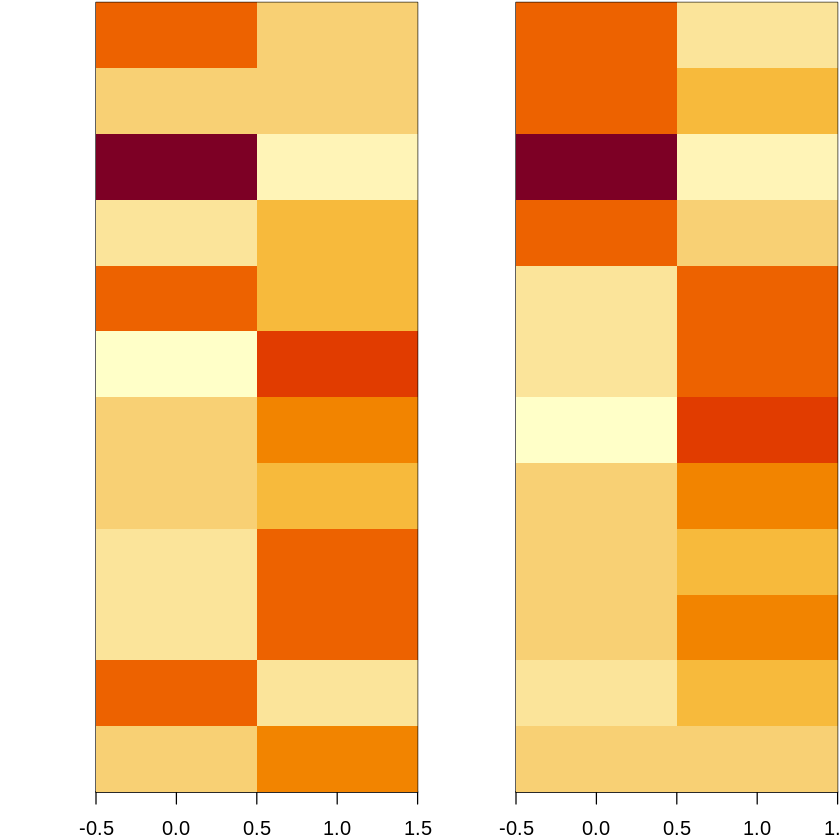

In [49]:
set.seed(1234)
dataMatrix = as.matrix(dataFrame)[sample(1:12),]
kmeansObj = kmeans(dataMatrix,centers=3)
par(mfrow=c(1,2), mar = c(2, 4, 0.1, 0.1))
image(t(dataMatrix)[,nrow(dataMatrix):1],yaxt="n")
image(t(dataMatrix)[,order(kmeansObj$cluster)],yaxt="n")

In [50]:
kmeans() , k=2

ERROR: ignored

In [51]:
if (!require('arules')){
install.packages("arules");
library(arules) #for Apriori演算法
}
if (!require('datasets')){
install.packages("datasets");
library(datasets) #for Groceries data
}
data(Groceries) # Load the data set
Groceries@data@Dim #169 種商品,9835筆交易資料

Loading required package: arules

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘arules’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




[1]  169 9835

In [52]:
rules <- apriori(Groceries, # data= Groceries

parameter = list(supp = 0.001, conf = 0.8), #參數最低限度
control = list(verbose=F)) #不要顯示output

options(digits=2) # Only 2 digits
inspect(rules[1:5]) # Show the top 5 rules

    lhs                        rhs            support confidence coverage lift
[1] {liquor,red/blush wine} => {bottled beer} 0.0019  0.90       0.0021   11.2
[2] {curd,cereals}          => {whole milk}   0.0010  0.91       0.0011    3.6
[3] {yogurt,cereals}        => {whole milk}   0.0017  0.81       0.0021    3.2
[4] {butter,jam}            => {whole milk}   0.0010  0.83       0.0012    3.3
[5] {soups,bottled beer}    => {whole milk}   0.0011  0.92       0.0012    3.6
    count
[1] 19   
[2] 10   
[3] 17   
[4] 10   
[5] 11   


In [53]:
rules<-sort(rules, by="confidence", decreasing=TRUE) #按照confidence排序
inspect(rules[1:5]) # Show the top 5 rules

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [54]:
rulesR = apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.08),
appearance = list(default="lhs",rhs="whole milk"), #設定右邊一定要是牛奶
control = list(verbose=F)) #不要顯示output
rulesR = sort(rulesR, decreasing=TRUE,by="confidence") #按照confidence排序
inspect(rulesR[1:5]) # Show the top 5 rules

    lhs                     rhs          support confidence coverage lift count
[1] {rice,                                                                     
     sugar}              => {whole milk}  0.0012          1   0.0012  3.9    12
[2] {canned fish,                                                              
     hygiene articles}   => {whole milk}  0.0011          1   0.0011  3.9    11
[3] {root vegetables,                                                          
     butter,                                                                   
     rice}               => {whole milk}  0.0010          1   0.0010  3.9    10
[4] {root vegetables,                                                          
     whipped/sour cream,                                                       
     flour}              => {whole milk}  0.0017          1   0.0017  3.9    17
[5] {butter,                                                                   
     soft cheese,                       

In [55]:
rulesL = apriori(data=Groceries, parameter=list(supp=0.001,conf = 0.15,minlen=2),
appearance = list(default="rhs",lhs="whole milk"), #設定左邊一定要是牛奶
control = list(verbose=F)) #不要顯示output
rulesL = sort(rulesL, decreasing=TRUE,by="confidence") #按照confidence排序
inspect(rulesL[1:5]) # Show the top 5 rules

    lhs             rhs                support confidence coverage lift count
[1] {whole milk} => {other vegetables} 0.075   0.29       0.26     1.5  736  
[2] {whole milk} => {rolls/buns}       0.057   0.22       0.26     1.2  557  
[3] {whole milk} => {yogurt}           0.056   0.22       0.26     1.6  551  
[4] {whole milk} => {root vegetables}  0.049   0.19       0.26     1.8  481  
[5] {whole milk} => {tropical fruit}   0.042   0.17       0.26     1.6  416  


In [56]:
if (!require('arulesViz')){
install.packages("arulesViz");
library(arulesViz)
}
#Mac->http://planspace.org/2013/01/17/fix-r-tcltk-dependency-problem-on-mac/
plot(rules,method="graph",interactive=TRUE,shading=NA) #會跑一陣子

Loading required package: arulesViz

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘arulesViz’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘gridExtra’, ‘bitops’, ‘zoo’, ‘foreach’, ‘viridis’, ‘gtools’, ‘caTools’, ‘lmtest’, ‘TSP’, ‘qap’, ‘gclus’, ‘dendextend’, ‘gplots’, ‘registry’, ‘hexbin’, ‘data.table’, ‘scatterplot3d’, ‘vcd’, ‘seriation’, ‘igraph’, ‘plotly’, ‘visNetwork’


Loading required package: grid

Warning message in plot.rules(rules, method = "graph", interactive = TRUE, shading = NA):
“The parameter interactive is deprecated. Use engine='interactive' instead.”
Warning message:
“plot: Too many rules supplied. Only plotting the best 100 rules using ‘support’ (change control parameter max if needed)”
Warning message:
“no DISPLAY variable so Tk is not available”


ERROR: ignored

In [ ]:
install.packages('prophet')
library(prophet)
library(dplyr)

In [58]:
devtools::install_github("rstudio/tensorflow")
library(tensorflow)
sess = tf$Session()
hello <- tf$constant('Hello, TensorFlow!')
sess$run(hello)

rappdirs   (NA    -> 0.3.1) [CRAN]
jsonlite   (1.7.1 -> 1.7.2) [CRAN]
reticulate (NA    -> 1.18 ) [CRAN]
config     (NA    -> 0.3  ) [CRAN]
ps         (1.4.0 -> 1.5.0) [CRAN]
tfruns     (NA    -> 1.4  ) [CRAN]


Installing 6 packages: rappdirs, jsonlite, reticulate, config, ps, tfruns

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpNz8WV1/remotes372e7b313a/rstudio-tensorflow-ef1e970/DESCRIPTION’
─  preparing ‘tensorflow’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘tensorflow_2.2.0.9000.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: ignored

In [ ]:
install.packages("drat", repos="https://cran.rstudio.com")
drat:::addRepo("dmlc")
install.packages("mxnet")

In [ ]:
if (!require('SportsAnalytics')){
install.packages("SportsAnalytics")
library(SportsAnalytics)
}
#擷取2015-2016年球季球員資料
NBA1516<-fetch_NBAPlayerStatistics("15-16")
NBA1516<-NBA1516[complete.cases(NBA1516),]

In [59]:
sample(1:10,3)
sample(1:nrow(NBA1516),nrow(NBA1516)/3)

[1] 2 4 3

[1] 370 257 357 167  16 301 164 288 129 420 114 195 233 102 131  75  41  62
 [19] 437 149 222 521 239 345 286  17 371  51  25 484 242 240 157 425 151 265
 [37]  88 134 402 501 473 225 325 224 344 203 417 479 338 230 419 518 259 522
 [55] 193 500 409 175  38 347 529 207 364 136 281  28 299   5  70 512 214 291
 [73] 182 489 376 502 413 192 229 205 237 118   3 144 132 232 200 303 355 504
 [91] 244  80 186 238 458 304  84  46 145 108  73 135  32 463 199 296 326 457
[109] 196 159 123 272 480 165   9  67  89 300  92 106  30 110 150 246 360  83
[127] 524 201 274 369  82  15 445  13 249  43  59 429 271 153 454  63 396 418
[145] 336  97 245 477 208  49 220  93 415  95 313 263 235 143 227 464 277 100
[163] 377 119 210 243  57  21 456 231 276 422  18 324 351 373

In [60]:
NBA1516$Test<-F #新增一個參數紀錄分組
#隨機取1/3當Test set
NBA1516[sample(1:nrow(NBA1516),nrow(NBA1516)/3),"Test"]<-T
# Training set : Test set球員數
c(sum(NBA1516$Test==F),sum(NBA1516$Test==T))

[1] 353 176

In [61]:
fit<-glm(TotalPoints~TotalMinutesPlayed+FieldGoalsAttempted+
Position+ThreesAttempted+FreeThrowsAttempted,
data =NBA1516[NBA1516$Test==F,])

summary(fit)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),14.2653,5.8401,2.4,1.5e-02
TotalMinutesPlayed,0.0084,0.0072,1.2,2.5e-01
FieldGoalsAttempted,1.0250,0.0265,38.7,1.8e-127
PositionPF,-10.1490,6.5175,-1.6,1.2e-01
PositionPG,-39.9328,6.7042,-6.0,6.4e-09
PositionSF,-23.8297,6.6641,-3.6,4.0e-04
PositionSG,-31.6070,7.0056,-4.5,8.8e-06
ThreesAttempted,0.0359,0.0299,1.2,2.3e-01
FreeThrowsAttempted,0.8303,0.0436,19.0,1.2e-55


In [62]:
library(MASS)
##根據AIC,做逐步選擇, 預設倒退學習 direction = "backward"
##trace=FALSE: 不要顯示步驟
finalModel_B<-stepAIC(fit,direction = "backward",trace=FALSE)
summary(finalModel_B)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),15.3,5.323,2.9,4.3e-03
FieldGoalsAttempted,1.1,0.012,85.5,9.1e-235
PositionPF,-9.1,6.395,-1.4,1.6e-01
PositionPG,-39.6,6.533,-6.1,3.5e-09
PositionSF,-22.3,6.432,-3.5,5.8e-04
PositionSG,-31.0,6.690,-4.6,5.2e-06
FreeThrowsAttempted,0.8,0.037,21.3,5.3e-65


In [63]:
##根據AIC,做逐步選擇, 往前學習 direction = "forward"
finalModel_F<-stepAIC(fit,direction = "forward",trace=FALSE)
summary(finalModel_F)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),14.2653,5.8401,2.4,1.5e-02
TotalMinutesPlayed,0.0084,0.0072,1.2,2.5e-01
FieldGoalsAttempted,1.0250,0.0265,38.7,1.8e-127
PositionPF,-10.1490,6.5175,-1.6,1.2e-01
PositionPG,-39.9328,6.7042,-6.0,6.4e-09
PositionSF,-23.8297,6.6641,-3.6,4.0e-04
PositionSG,-31.6070,7.0056,-4.5,8.8e-06
ThreesAttempted,0.0359,0.0299,1.2,2.3e-01
FreeThrowsAttempted,0.8303,0.0436,19.0,1.2e-55


In [64]:
##根據AIC,做逐步選擇, 雙向學習 direction = "both"
finalModel_Both<-stepAIC(fit,direction = "both",trace=FALSE)
summary(finalModel_Both)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),15.3,5.323,2.9,4.3e-03
FieldGoalsAttempted,1.1,0.012,85.5,9.1e-235
PositionPF,-9.1,6.395,-1.4,1.6e-01
PositionPG,-39.6,6.533,-6.1,3.5e-09
PositionSF,-22.3,6.432,-3.5,5.8e-04
PositionSG,-31.0,6.690,-4.6,5.2e-06
FreeThrowsAttempted,0.8,0.037,21.3,5.3e-65


In [65]:
predictPoint<-predict(finalModel_Both, #Test==T, test data
newdata = NBA1516[NBA1516$Test==T,])

cor(x=predictPoint,y=NBA1516[NBA1516$Test==T,]$TotalPoints) #相關係數

[1] 1

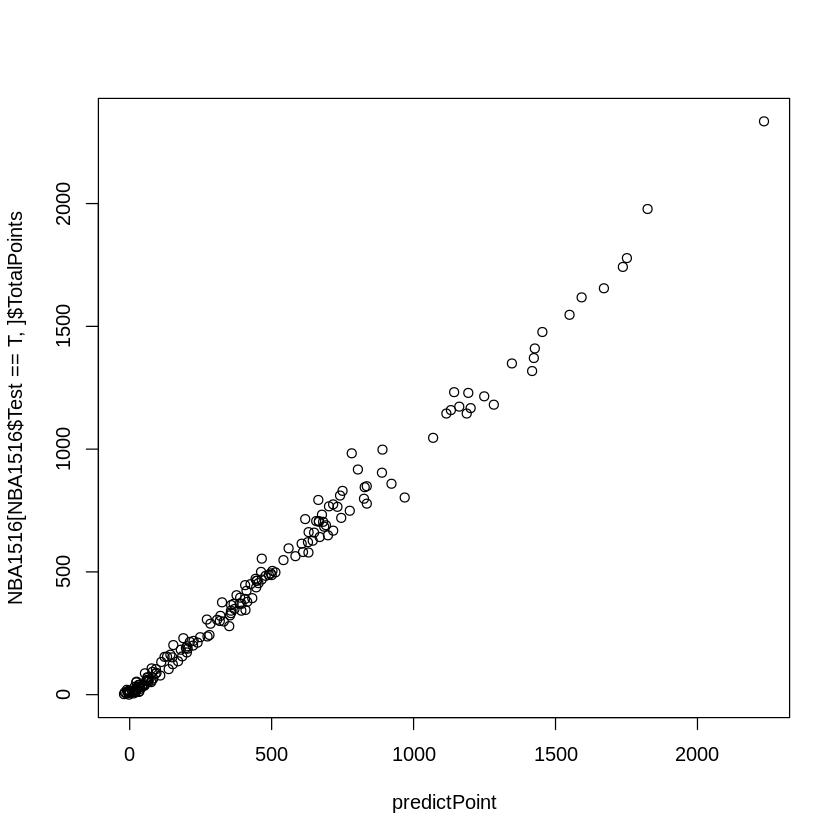

In [66]:
plot(x=predictPoint,y=NBA1516[NBA1516$Test==T,]$TotalPoints)

In [77]:
mydata <- read.csv("https://raw.githubusercontent.com/CGUIM-BigDataAnalysis/BigDataCGUIM/master/binary.csv")
mydata$admit <- factor(mydata$admit) # 類別變項要轉為factor
mydata$rank <- factor(mydata$rank) # 類別變項要轉為factor
mydata$Test<-F #新增一個參數紀錄分組
mydata[sample(1:nrow(mydata),nrow(mydata)/3),"Test"]<-T #隨機取1/3當Test set
c(sum(mydata$Test==F),sum(mydata$Test==T)) # Training set : Test set學生數

[1] 267 133

In [78]:
mydata$admit<-factor(mydata$admit,levels=c(0,1))

In [79]:
# GRE:某考試成績, GPA:在校平均成績, rank:學校聲望
mylogit <- glm(admit ~ gre + gpa + rank,

data = mydata[mydata$Test==F,], family = "binomial")
finalFit<-stepAIC(mylogit,direction = "both",trace=FALSE) # 雙向逐步選擇模型
summary(finalFit)


Call:
glm(formula = admit ~ gre + gpa + rank, family = "binomial", 
    data = mydata[mydata$Test == F, ])

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.567  -0.843  -0.631   1.066   2.176  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.64947    1.41841   -2.57  0.01008 *  
gre          0.00227    0.00147    1.55  0.12229    
gpa          0.73613    0.41185    1.79  0.07388 .  
rank2       -0.91444    0.41087   -2.23  0.02604 *  
rank3       -1.52199    0.43805   -3.47  0.00051 ***
rank4       -1.90509    0.57157   -3.33  0.00086 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 326.03  on 266  degrees of freedom
Residual deviance: 297.87  on 261  degrees of freedom
AIC: 309.9

Number of Fisher Scoring iterations: 4


In [80]:
AdmitProb<-predict(finalFit, # 用Training set做的模型

newdata = mydata[mydata$Test==T,], #Test==T, test data
type="response") #結果為每個人被錄取的機率

head(AdmitProb)

1     2     3     4     5     7 
0.161 0.274 0.752 0.147 0.098 0.453

In [81]:
table(AdmitProb>0.5,mydata[mydata$Test==T,]$admit) # row,column

       
         0  1
  FALSE 79 38
  TRUE   7  9

In [82]:
table(AdmitProb>0.5,mydata[mydata$Test==T,]$admit) # row,column

       
         0  1
  FALSE 79 38
  TRUE   7  9

In [83]:
AdmitProb<-predict(finalFit,

newdata = mydata[mydata$Test==T,], #Test==T, test data
type="response") #結果為每個人被錄取的機率
AdmitAns<-factor(ifelse(AdmitProb>0.5,1,0),levels=c(0,1))
str(AdmitAns)

 Factor w/ 2 levels "0","1": 1 1 2 1 1 1 1 1 2 2 ...
 - attr(*, "names")= chr [1:133] "1" "2" "3" "4" ...


In [86]:
install.packages("caret")
library(caret) # install.packages("caret") #計算參數的packages
sensitivity(AdmitAns,mydata[mydata$Test==T,]$admit,positive = "1")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘gower’, ‘ipred’, ‘timeDate’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:tensorflow’:

    train




[1] 0.19

In [87]:
specificity(AdmitAns,mydata[mydata$Test==T,]$admit,negative = "0")

[1] 0.92

In [88]:
posPredValue(AdmitAns,mydata[mydata$Test==T,]$admit,positive = "1")

[1] 0.56

In [89]:
negPredValue(AdmitAns,mydata[mydata$Test==T,]$admit,negative = "0")

[1] 0.68

In [90]:
if (!require('rpart')){
install.packages("rpart"); library(rpart)
}
DT<-rpart(Position~Blocks+TotalRebounds+ThreesMade+Assists+Steals,
data=NBA1516[NBA1516$Test==F,]) #訓練組 Training set

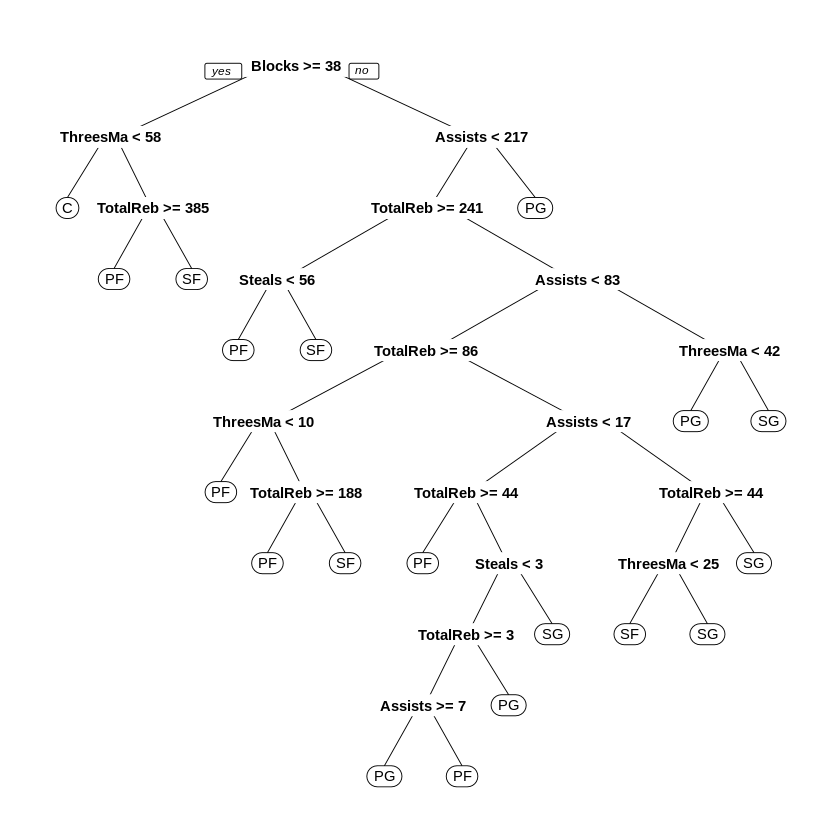

In [91]:
if (!require('rpart.plot')){
install.packages("rpart.plot");
library(rpart.plot)
}
prp(DT) # 把決策樹畫出來

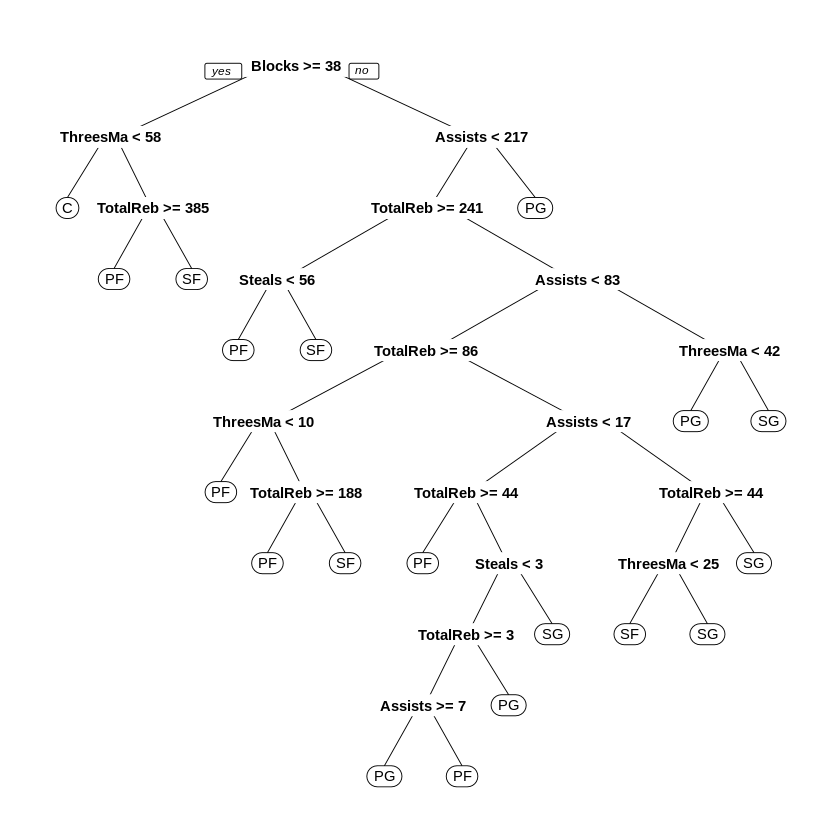

In [92]:
prp(DT)

In [93]:
posPred<-predict(DT,newdata= NBA1516[NBA1516$Test==T,]) #Test==T, test data
# 預設為class probabilities, type = "prob"
head(posPred)

,C,PF,PG,SF,SG
7,0.81,0.16,0.000,0.032,0.000
9,0.38,0.62,0.000,0.000,0.000
12,0.17,0.41,0.034,0.207,0.172
15,0.00,0.12,0.118,0.294,0.471
17,0.27,0.18,0.000,0.455,0.091
21,0.81,0.16,0.000,0.032,0.000


In [94]:
result<-cbind(round(posPred,digits = 2),
NBA1516[NBA1516$Test==T,]$Name,

as.character(NBA1516[NBA1516$Test==T,]$Position))
head(result)

,C,PF,PG,SF,SG,,
7,0.81,0.16,0,0.03,0,Jarrett Allen,PF
9,0.38,0.62,0,0,0,Al-farouq Aminu,SF
12,0.17,0.41,0.03,0.21,0.17,Ryan Anderson,PF
15,0,0.12,0.12,0.29,0.47,T Antetokounmpo,SF
17,0.27,0.18,0,0.45,0.09,Og Anunoby,SF
21,0.81,0.16,0,0.03,0,Deandre Ayton,C


In [95]:
posPredC<-predict(DT,newdata= NBA1516[NBA1516$Test==T,],type = "class")
# type = "class" 直接預測類別
head(posPredC)

7  9 12 15 17 21 
 C PF PF SG SF  C 
Levels: C PF PG SF SG

In [96]:
resultC<-cbind(as.character(posPredC),NBA1516[NBA1516$Test==T,]$Name,
as.character(NBA1516[NBA1516$Test==T,]$Position))
head(resultC)

C,Jarrett Allen,PF
PF,Al-farouq Aminu,SF
PF,Ryan Anderson,PF
SG,T Antetokounmpo,SF
SF,Og Anunoby,SF
C,Deandre Ayton,C


In [97]:
install.packages("mlbench") # 此package內有很多dataset可練習
library(mlbench)
data(Sonar)
str(Sonar) #看一下資料型別,有沒有缺值,類別變項是不是factor

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



'data.frame':	208 obs. of  61 variables:
 $ V1   : num  0.02 0.0453 0.0262 0.01 0.0762 0.0286 0.0317 0.0519 0.0223 0.0164 ...
 $ V2   : num  0.0371 0.0523 0.0582 0.0171 0.0666 0.0453 0.0956 0.0548 0.0375 0.0173 ...
 $ V3   : num  0.0428 0.0843 0.1099 0.0623 0.0481 ...
 $ V4   : num  0.0207 0.0689 0.1083 0.0205 0.0394 ...
 $ V5   : num  0.0954 0.1183 0.0974 0.0205 0.059 ...
 $ V6   : num  0.0986 0.2583 0.228 0.0368 0.0649 ...
 $ V7   : num  0.154 0.216 0.243 0.11 0.121 ...
 $ V8   : num  0.16 0.348 0.377 0.128 0.247 ...
 $ V9   : num  0.3109 0.3337 0.5598 0.0598 0.3564 ...
 $ V10  : num  0.211 0.287 0.619 0.126 0.446 ...
 $ V11  : num  0.1609 0.4918 0.6333 0.0881 0.4152 ...
 $ V12  : num  0.158 0.655 0.706 0.199 0.395 ...
 $ V13  : num  0.2238 0.6919 0.5544 0.0184 0.4256 ...
 $ V14  : num  0.0645 0.7797 0.532 0.2261 0.4135 ...
 $ V15  : num  0.066 0.746 0.648 0.173 0.453 ...
 $ V16  : num  0.227 0.944 0.693 0.213 0.533 ...
 $ V17  : num  0.31 1 0.6759 0.0693 0.7306 ...
 $ V18  : num  0.

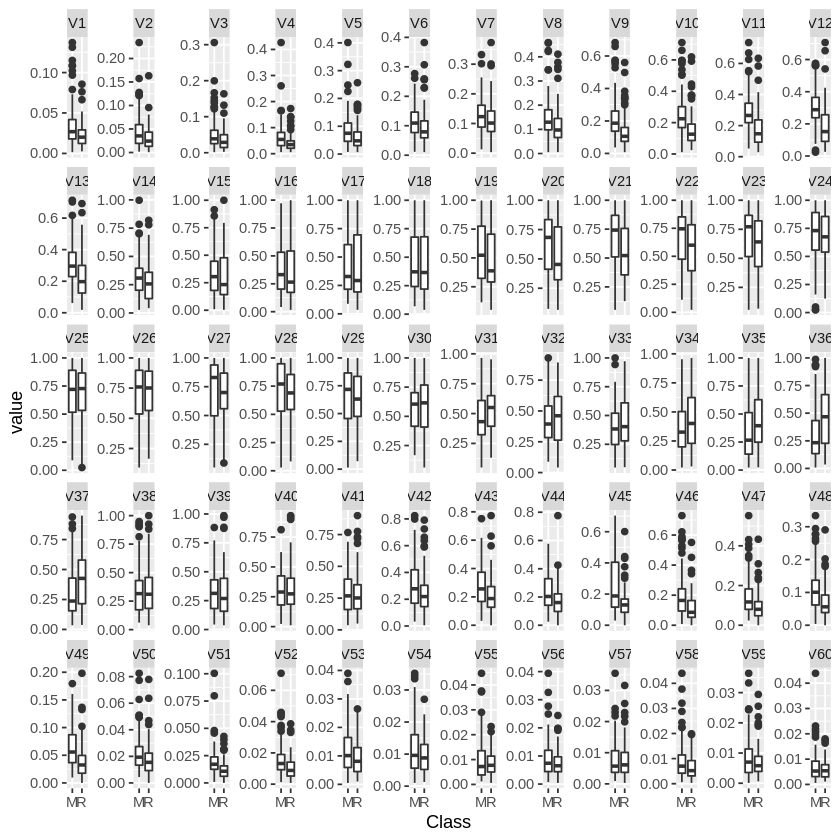

In [98]:
library(ggplot2);library(reshape2) #install.packages(c("ggplot2","reshape2"))
Sonar.m<-melt(Sonar,id.vars = c("Class"))
ggplot(Sonar.m)+geom_boxplot(aes(x=Class,y=value))+
facet_wrap(~variable, nrow=5,scales = "free_y") #圖片太小了

In [99]:
Sonar$Test<-F #新增一個參數紀錄分組
#隨機取1/3當Test set
Sonar[sample(1:nrow(Sonar),nrow(Sonar)/3),"Test"]<-T
# 看一下 Training set : Test set 案例數
c(sum(Sonar$Test==F),sum(Sonar$Test==T))

[1] 139  69

In [100]:
fit<-glm(Class~., Sonar[Sonar$Test==F,],family="binomial")
finalFit<-stepAIC(fit,direction = "both",trace = F)
summary(finalFit)$coefficients

串流輸出內容已截斷至最後 5000 行。
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numeric

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),758,120949,0.0063,1.00
V2,-7549,1205884,-0.0063,1.00
V3,6504,1103980,0.0059,1.00
V4,-2869,471144,-0.0061,1.00
V7,1702,328943,0.0052,1.00
V12,-1116,188633,-0.0059,1.00
V16,737,121389,0.0061,1.00
V19,-534,110605,-0.0048,1.00
V22,-366,97247,-0.0038,1.00
V24,-457,104158,-0.0044,1.00


In [101]:
MinePred<-predict(finalFit,newdata = Sonar[Sonar$Test==T,])
MineAns<-ifelse(MinePred>0.5,"R","M") #>0.5: Level 2
MineAns<-factor(MineAns,levels = c("M","R"))
MineAns

8  14  16  22  24  26  30  32  34  35  37  39  40  43  45  52  53  56  58  59 
  R   R   R   M   R   R   M   R   M   M   R   R   R   R   M   R   R   R   R   R 
 60  77  78  81  86  87  89  90  91  92  94 100 103 105 107 108 116 120 123 124 
  R   R   R   M   R   R   R   R   R   R   M   M   M   M   M   R   R   M   M   R 
130 133 135 139 142 143 146 149 154 157 159 162 164 165 167 171 176 179 180 182 
  M   R   R   M   M   M   M   M   M   R   M   M   R   M   M   R   M   M   M   M 
185 186 193 197 199 200 203 204 206 
  M   M   M   M   M   M   M   M   M 
Levels: M R

In [102]:
sensitivity(MineAns,Sonar[Sonar$Test==T,]$Class)

[1] 0.79

In [103]:
specificity(MineAns,Sonar[Sonar$Test==T,]$Class)

[1] 0.77

In [104]:
posPredValue(MineAns,Sonar[Sonar$Test==T,]$Class)

[1] 0.81

In [105]:
negPredValue(MineAns,Sonar[Sonar$Test==T,]$Class)

[1] 0.75